In [1]:
import re
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
%matplotlib inline

In [2]:
path = os.getcwd()

In [3]:
df  =pd.read_csv(path+'/Kickstarter/test.csv')

In [4]:
df.head(5)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,13,‘The Life of Henry Lethe’ is about a man suffe...,"{""id"":31,""name"":""Narrative Film"",""slug"":""film ...",781,US,1285016574,"{""id"":85992704,""name"":""Zoe Miller"",""is_registe...",USD,$,True,...,the-life-of-henry-lethe-senior-thesis-film,https://www.kickstarter.com/discover/categorie...,True,False,successful,1289088011,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",781.00000,domestic
1,0,If you believe in heaven you must beleive in h...,"{""id"":297,""name"":""Horror"",""slug"":""film & video...",0,GB,1484080235,"{""id"":1694112044,""name"":""Thomas Williamson"",""i...",GBP,£,False,...,the-meadowzs,https://www.kickstarter.com/discover/categorie...,False,False,failed,1487168789,1.219066,"{""web"":{""project"":""https://www.kickstarter.com...",0.00000,international
2,317,Hop in the Saddle is a guide to Portland's cra...,"{""id"":48,""name"":""Nonfiction"",""slug"":""publishin...",17358,US,1334081369,"{""id"":1548588607,""name"":""Hop in the Saddle"",""i...",USD,$,True,...,hop-in-the-saddle,https://www.kickstarter.com/discover/categorie...,True,True,successful,1348163682,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",17358.66000,international
3,12,My creation went viral and I require funds for...,"{""id"":351,""name"":""Printing"",""slug"":""crafts/pri...",270,CA,1456613951,"{""id"":294483555,""name"":""Andrea owner of Peanut...",CAD,$,True,...,peanut-parade-adulting-is-hard-reward-stickers...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1459257281,0.739775,"{""web"":{""project"":""https://www.kickstarter.com...",264.09955,international
4,69,"Light the Water is a short, dark film revealin...","{""id"":32,""name"":""Shorts"",""slug"":""film & video/...",7009,US,1278718229,"{""id"":1239226656,""name"":""Robin Griswold"",""slug...",USD,$,True,...,dream-of-ghosts-a-short-film-by-robin-griswold...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1282779009,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",7009.00000,domestic


In [7]:
df.shape

(203416, 37)

In [8]:
#对category进行处理
def Category(category):
    str1 ='"slug":"\w*/'
    str2 ='"slug":"\w*"'
    str3 ='"slug":"\w* '
    regu_cont1 =re.compile(str1)
    regu_cont2 =re.compile(str2)
    regu_cont3 =re.compile(str3)
    m =regu_cont1.search(category)
    t =regu_cont2.search(category)
    w =regu_cont3.search(category)
    if m:
        result =m.group()
        return   result[8:-1]
    elif t:
        result =t.group()
        # print(result)
        return  result[8:-1]
    elif w:
        result =w.group()
        return result[8:-1]
df['category'] = df['category'].apply(Category)

In [9]:
df.category.value_counts()

film           26753
music          26715
technology     20872
art            20165
publishing     19554
food           15820
games          13532
fashion        11827
comics          8724
design          8661
photography     7804
crafts          7008
theater         6627
journalism      5529
dance           3825
Name: category, dtype: int64

In [10]:
#删除非成功或是失败样本
df =df[~df['state'].isin(['canceled','live','suspended'])]

In [11]:
df.state.value_counts()

successful    114580
failed         73647
Name: state, dtype: int64

In [12]:
#将unix时间转换为标准时间
def Replace_date(date):
    dt =datetime.date.fromtimestamp(int(date))
    return dt
df['created_at'] = df['created_at'].apply(Replace_date)
df['deadline']  =df['deadline'].apply(Replace_date)

In [13]:
min(df['created_at'])

datetime.date(2009, 4, 22)

In [14]:
max(df['created_at'])

datetime.date(2018, 11, 29)

## df.head()

In [15]:
#计算项目的期限
def Duration(row):
    return (row['deadline'] - row['created_at']).days
df['duration'] = df.apply(Duration, axis=1)

In [23]:
#仅保留2015-01-01后的项目
df= df[df['created_at'].astype(str) >= '2013-01-01']

In [24]:
df= df[df['created_at'].astype(str) <= '2015-01-01']

In [25]:
max(df['created_at'])

datetime.date(2015, 1, 1)

In [26]:
min(df['created_at'])

datetime.date(2013, 1, 1)

In [27]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,duration
9,81,Frequency Fridays is a performance series feat...,music,4015,US,2013-01-20,"{""id"":1435431731,""name"":""Alison Colman"",""slug""...",USD,$,True,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1362244831,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",4015.0000,international,42
10,5,Rex is a platformer game that uses retro style...,games,66,US,2013-08-19,"{""id"":137500202,""name"":""Joseph MacDonald"",""is_...",USD,$,True,...,https://www.kickstarter.com/discover/categorie...,False,True,failed,1380470272,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",66.0000,domestic,41
11,27,Raising funds in order to finance the manufact...,fashion,4600,US,2014-06-05,"{""id"":1201999415,""name"":""D E B I L Leather Go...",USD,$,True,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1404921836,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",4600.0000,domestic,35
15,1,"To design a brand new TV show, called the Adve...",film,5,US,2013-08-22,"{""id"":1893787691,""name"":""Jason E Higgins"",""is_...",USD,$,True,...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1379358789,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",5.0000,domestic,26
16,57,LagosPhoto is expanding its annual festival to...,photography,19719,GB,2014-11-05,"{""id"":2042961719,""name"":""LagosPhoto"",""is_regis...",GBP,£,False,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1421314949,1.564857,"{""web"":{""project"":""https://www.kickstarter.com...",20252.3802,domestic,71


In [28]:
df.shape

(53661, 38)

In [29]:
df.state.value_counts()

successful    30893
failed        22768
Name: state, dtype: int64

In [31]:
df['created_day'] =df.created_at.apply(lambda x: x.day)

In [32]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,duration,created_day
9,81,Frequency Fridays is a performance series feat...,music,4015,US,2013-01-20,"{""id"":1435431731,""name"":""Alison Colman"",""slug""...",USD,$,True,...,True,False,successful,1362244831,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",4015.0000,international,42,20
10,5,Rex is a platformer game that uses retro style...,games,66,US,2013-08-19,"{""id"":137500202,""name"":""Joseph MacDonald"",""is_...",USD,$,True,...,False,True,failed,1380470272,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",66.0000,domestic,41,19
11,27,Raising funds in order to finance the manufact...,fashion,4600,US,2014-06-05,"{""id"":1201999415,""name"":""D E B I L Leather Go...",USD,$,True,...,False,False,failed,1404921836,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",4600.0000,domestic,35,5
15,1,"To design a brand new TV show, called the Adve...",film,5,US,2013-08-22,"{""id"":1893787691,""name"":""Jason E Higgins"",""is_...",USD,$,True,...,False,False,failed,1379358789,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",5.0000,domestic,26,22
16,57,LagosPhoto is expanding its annual festival to...,photography,19719,GB,2014-11-05,"{""id"":2042961719,""name"":""LagosPhoto"",""is_regis...",GBP,£,False,...,True,True,successful,1421314949,1.564857,"{""web"":{""project"":""https://www.kickstarter.com...",20252.3802,domestic,71,5


In [33]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'duration',
       'created_day'],
      dtype='object')

In [34]:
df.country.value_counts()

US    43312
GB     5775
CA     2447
AU     1198
NL      430
NZ      232
SE       96
DK       78
IE       50
NO       43
Name: country, dtype: int64

In [35]:
#对洲进行处理
def Continent(row):
    if row.country in ['US', 'CA', 'MX'] :
        return 'America'
    elif row.country in ['HK', 'SG', 'JP'] :
        return 'Asia'
    elif row.country in ['AU'] :
        return 'Oceania'
    else :
        return 'Europe'
df['continent'] = df.apply(Continent, axis=1)

In [36]:
df.continent.value_counts()

America    45759
Europe      6704
Oceania     1198
Name: continent, dtype: int64

In [37]:
df.rename(columns={'state' : 'status'}, inplace=True)

In [38]:
df.shape

(53661, 40)

In [39]:
df.status.value_counts()

successful    30893
failed        22768
Name: status, dtype: int64

In [40]:
min(df.created_at)

datetime.date(2013, 1, 1)

In [41]:
df.location

9         {"id":2383660,"name":"Columbus","slug":"columb...
10        {"id":2508215,"name":"Troy","slug":"troy-ny","...
11        {"id":2471217,"name":"Philadelphia","slug":"ph...
15        {"id":2471390,"name":"Phoenix","slug":"phoenix...
16        {"id":1398823,"name":"Lagos","slug":"lagos-ng"...
17        {"id":2457251,"name":"Nathalie","slug":"nathal...
18        {"id":2400849,"name":"Everett","slug":"everett...
22        {"id":2358820,"name":"Baltimore","slug":"balti...
29        {"id":2461589,"name":"North Salt Lake","slug":...
34        {"id":2475687,"name":"Portland","slug":"portla...
38        {"id":2457170,"name":"Nashville","slug":"nashv...
45        {"id":2442047,"name":"Los Angeles","slug":"los...
47        {"id":12602158,"name":"Greater Manchester","sl...
50        {"id":2431572,"name":"Kennewick","slug":"kenne...
57        {"id":2442047,"name":"Los Angeles","slug":"los...
60        {"id":2513035,"name":"Wadsworth","slug":"wadsw...
72        {"id":12602176,"name":"Surrey"

In [42]:
df =df[~df['location'].isna()]

In [43]:
df.isna().sum()

backers_count                   0
blurb                           0
category                        0
converted_pledged_amount        0
country                         0
created_at                      0
creator                         0
currency                        0
currency_symbol                 0
currency_trailing_code          0
current_currency                0
deadline                        0
disable_communication           0
friends                     53661
fx_rate                         0
goal                            0
id                              0
is_backing                  53661
is_starrable                    0
is_starred                  53661
launched_at                     0
location                        0
name                            0
permissions                 53661
photo                           0
pledged                         0
profile                         0
slug                            0
source_url                      0
spotlight     

In [44]:
df.shape

(53661, 40)

In [45]:
def Location(location):
    r =re.compile(r'"short_name":".*"displayable_name')
    result =r.search(location).group()
#     print(result[14: -19])
    return result[14:-19]
df['location'] =df['location'].apply(Location)

In [46]:
df.location

9                       Columbus, OH
10                          Troy, NY
11                  Philadelphia, PA
15                       Phoenix, AZ
16                    Lagos, Nigeria
17                      Nathalie, VA
18                       Everett, WA
22                     Baltimore, MD
29               North Salt Lake, UT
34                      Portland, OR
38                     Nashville, TN
45                   Los Angeles, CA
47            Greater Manchester, UK
50                     Kennewick, WA
57                   Los Angeles, CA
60                     Wadsworth, OH
72                        Surrey, UK
83                      Brooklyn, NY
84                      Hinsdale, IL
85                  Walnut Creek, CA
86                   Abergavenny, UK
90                         Acton, MA
95                  Delray Beach, FL
98                       Orlando, FL
101                       Venice, CA
102              Taipei City, Taiwan
107                      Garland, TX
1

In [47]:
df['city'] = df.location.apply(lambda x : x.split(', ')[0])
# df['state'] = df.location.apply(lambda x : x.split(', ')[1])

In [48]:
df.city

9                       Columbus
10                          Troy
11                  Philadelphia
15                       Phoenix
16                         Lagos
17                      Nathalie
18                       Everett
22                     Baltimore
29               North Salt Lake
34                      Portland
38                     Nashville
45                   Los Angeles
47            Greater Manchester
50                     Kennewick
57                   Los Angeles
60                     Wadsworth
72                        Surrey
83                      Brooklyn
84                      Hinsdale
85                  Walnut Creek
86                   Abergavenny
90                         Acton
95                  Delray Beach
98                       Orlando
101                       Venice
102                  Taipei City
107                      Garland
114                       Durham
124                      Cordele
126                      Comines
          

In [49]:
df['state'] = df.location.apply(lambda x : x.split(', ')[-1])

In [50]:
pd.set_option('max_row', 1000)

In [51]:
df['state'].value_counts()

CA                            7770
UK                            5412
NY                            4661
TX                            2502
Canada                        2382
FL                            2147
IL                            1633
WA                            1487
PA                            1367
MA                            1223
OH                            1190
AU                            1135
OR                            1132
GA                            1058
MI                            1049
CO                            1027
NC                             952
AZ                             936
VA                             836
MN                             835
TN                             788
UT                             715
NJ                             683
MO                             634
MD                             570
WI                             537
IN                             492
NV                             461
DC                  

In [52]:
df.shape

(53661, 42)

In [53]:
df.fx_rate.value_counts()

1.000000    43312
1.250749     3779
1.261110     1996
0.747468     1630
0.748587      817
0.721527      780
0.722499      418
1.132671      316
1.136508      164
0.688599      144
0.685863       88
0.110125       66
0.151736       63
0.110053       30
0.116690       30
0.152258       15
0.116648       13
Name: fx_rate, dtype: int64

In [54]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,duration,created_day,continent,city,state
9,81,Frequency Fridays is a performance series feat...,music,4015,US,2013-01-20,"{""id"":1435431731,""name"":""Alison Colman"",""slug""...",USD,$,True,...,1362244831,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",4015.0000,international,42,20,America,Columbus,OH
10,5,Rex is a platformer game that uses retro style...,games,66,US,2013-08-19,"{""id"":137500202,""name"":""Joseph MacDonald"",""is_...",USD,$,True,...,1380470272,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",66.0000,domestic,41,19,America,Troy,NY
11,27,Raising funds in order to finance the manufact...,fashion,4600,US,2014-06-05,"{""id"":1201999415,""name"":""D E B I L Leather Go...",USD,$,True,...,1404921836,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",4600.0000,domestic,35,5,America,Philadelphia,PA
15,1,"To design a brand new TV show, called the Adve...",film,5,US,2013-08-22,"{""id"":1893787691,""name"":""Jason E Higgins"",""is_...",USD,$,True,...,1379358789,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",5.0000,domestic,26,22,America,Phoenix,AZ
16,57,LagosPhoto is expanding its annual festival to...,photography,19719,GB,2014-11-05,"{""id"":2042961719,""name"":""LagosPhoto"",""is_regis...",GBP,£,False,...,1421314949,1.564857,"{""web"":{""project"":""https://www.kickstarter.com...",20252.3802,domestic,71,5,Europe,Lagos,Nigeria


In [55]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'status', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type', 'duration',
       'created_day', 'continent', 'city', 'state'],
      dtype='object')

In [57]:
df.drop(columns=['blurb', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'creator','id',
                 'disable_communication', 'friends','is_backing', 'is_starrable', 'is_starred',
                 'name', 'permissions', 'photo', 'profile', 'slug', 'source_url', 'static_usd_rate','staff_pick',
                 'urls', 'usd_pledged', 'spotlight','usd_type'], inplace=True, axis=1)

In [58]:
df.columns

Index(['backers_count', 'category', 'converted_pledged_amount', 'country',
       'created_at', 'currency', 'deadline', 'fx_rate', 'goal', 'launched_at',
       'location', 'pledged', 'status', 'state_changed_at', 'duration',
       'created_day', 'continent', 'city', 'state'],
      dtype='object')

In [64]:
# df.drop(columns=['launched_at','loacation' , 'created_at' 'deadline','pleged'], inplace=True, axis=1)

In [65]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,launched_at,location,pledged,status,duration,created_day,continent,city,state
9,81,music,US,2013-01-20,USD,2013-03-03,1.00000,4000.0,1360084830,"Columbus, OH",4015.0,successful,42,20,America,Columbus,OH
10,5,games,US,2013-08-19,USD,2013-09-29,1.00000,5000.0,1379174272,"Troy, NY",66.0,failed,41,19,America,Troy,NY
11,27,fashion,US,2014-06-05,USD,2014-07-10,1.00000,50000.0,1402329836,"Philadelphia, PA",4600.0,failed,35,5,America,Philadelphia,PA
15,1,film,US,2013-08-22,USD,2013-09-17,1.00000,5000.0,1377229599,"Phoenix, AZ",5.0,failed,26,22,America,Phoenix,AZ
16,57,photography,GB,2014-11-05,GBP,2015-01-15,1.26111,12000.0,1417426948,"Lagos, Nigeria",12942.0,successful,71,5,Europe,Lagos,Nigeria


In [66]:
df.shape

(53661, 17)

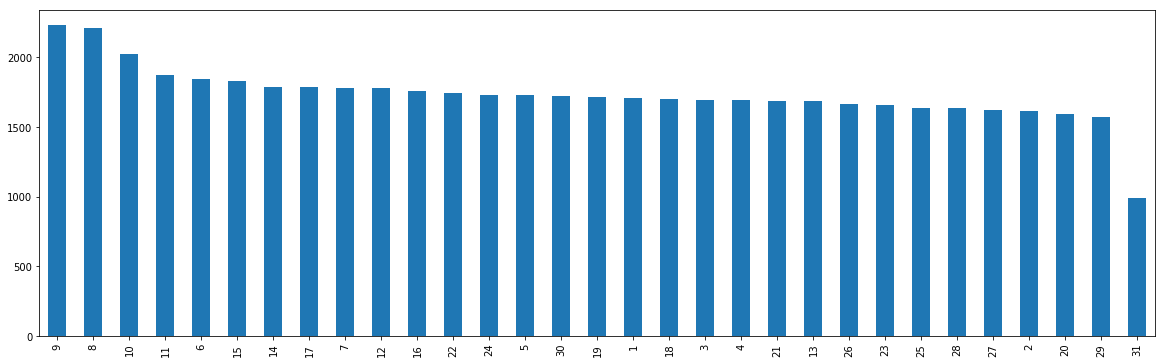

In [67]:
df.created_day.value_counts()
df.created_day.value_counts().plot(kind ='bar',figsize = (20,6))

In [68]:
df.drop(columns=['launched_at'], inplace=True, axis=1)

In [69]:
df.isna().sum()

backers_count    0
category         0
country          0
created_at       0
currency         0
deadline         0
fx_rate          0
goal             0
location         0
pledged          0
status           0
duration         0
created_day      0
continent        0
city             0
state            0
dtype: int64

In [70]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,status,duration,created_day,continent,city,state
9,81,music,US,2013-01-20,USD,2013-03-03,1.00000,4000.0,"Columbus, OH",4015.0,successful,42,20,America,Columbus,OH
10,5,games,US,2013-08-19,USD,2013-09-29,1.00000,5000.0,"Troy, NY",66.0,failed,41,19,America,Troy,NY
11,27,fashion,US,2014-06-05,USD,2014-07-10,1.00000,50000.0,"Philadelphia, PA",4600.0,failed,35,5,America,Philadelphia,PA
15,1,film,US,2013-08-22,USD,2013-09-17,1.00000,5000.0,"Phoenix, AZ",5.0,failed,26,22,America,Phoenix,AZ
16,57,photography,GB,2014-11-05,GBP,2015-01-15,1.26111,12000.0,"Lagos, Nigeria",12942.0,successful,71,5,Europe,Lagos,Nigeria


In [75]:
df.to_csv(path+'/Kickstarter/cleaned_kick_data02.csv', index=False)

In [71]:
df.category.value_counts()

technology     7201
music          6819
art            5122
publishing     4921
film           4696
food           4652
games          4016
fashion        3579
design         2752
photography    2367
comics         2274
journalism     1625
crafts         1540
dance          1132
theater         965
Name: category, dtype: int64

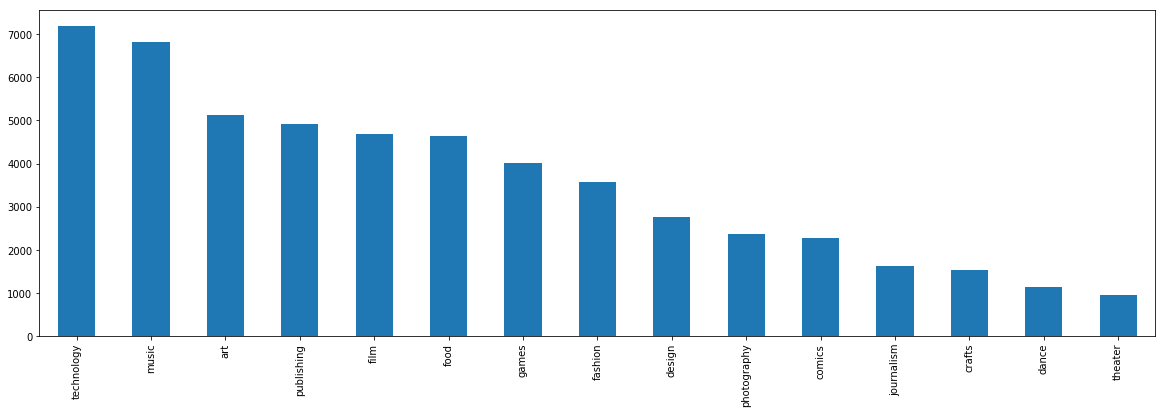

In [72]:
df.category.value_counts().plot(kind ='bar', figsize =(20, 6))

/Users/zhenghongsheng/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/zhenghongsheng/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


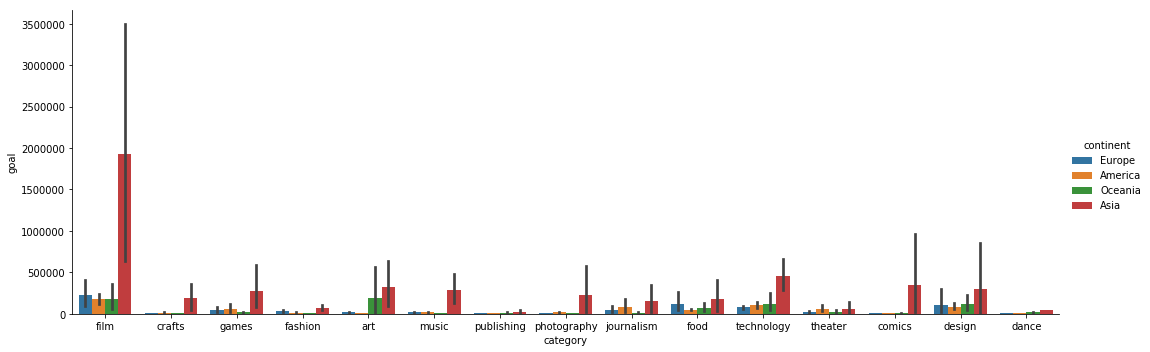

In [171]:
sns.factorplot(x='category', y ='goal', data =df, hue ='continent', kind ='bar', size=5, aspect =3 )

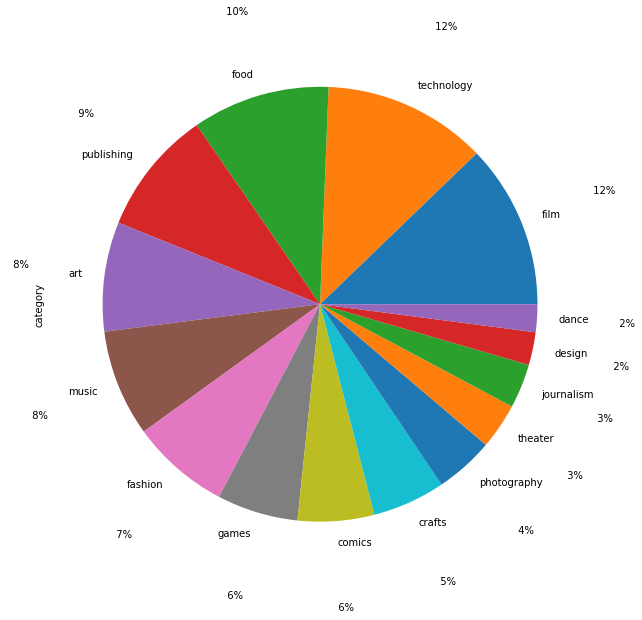

In [185]:
df.category.value_counts(normalize =True).plot('pie', figsize =(20, 10), pctdistance=1.4, autopct='%3.0f%%')

In [186]:
df.to_csv(path +'/Kickstarter/cleaned_kick_data01.csv', index=False)

In [80]:
#对标称属性进行独热编码，转化为数值属性
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['backers_count'] =le.fit_transform(df['backers_count'].values)
df['category'] =le.fit_transform(df['category'].values)
df['country'] =le.fit_transform(df['country'].values)
df['pledged'] =le.fit_transform(df['pledged'].values)
# df['spotlight'] =le.fit_transform(df['spotlight'].values)
df['staff_pick'] =le.fit_transform(df['staff_pick'].values)
df['duration'] =le.fit_transform(df['duration'].values)
df['continent'] =le.fit_transform(df['continent'].values)
df['city'] =le.fit_transform(df['city'].values)
df['state'] =le.fit_transform(df['state'].values)
df['currency'] =le.fit_transform(df['currency'].values)

In [81]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
1,0,6,9,2017-01-11,5,2017-02-15,1.261110,40000.0,"London, UK",0,0,failed,34,11,2,2187,169
8,2,6,21,2018-05-18,13,2018-06-17,1.000000,30000.0,"Los Angeles, CA",7,0,failed,29,18,0,2210,22
13,26,2,21,2017-04-07,13,2017-05-03,1.000000,1000.0,"Yakima, WA",1588,0,successful,25,7,0,4364,180
25,208,5,21,2018-09-29,13,2018-11-14,1.000000,20000.0,"Salt Lake City, UT",10491,0,successful,45,29,0,3341,170
41,268,8,13,2017-09-13,7,2017-12-20,0.008811,12000000.0,"Kyoto-shi, Japan",13175,1,failed,97,13,1,1980,78


In [82]:
df.shape

(30550, 17)

In [83]:
df['status'] =df.status.str.contains('successful').astype(int)

In [84]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
1,0,6,9,2017-01-11,5,2017-02-15,1.261110,40000.0,"London, UK",0,0,0,34,11,2,2187,169
8,2,6,21,2018-05-18,13,2018-06-17,1.000000,30000.0,"Los Angeles, CA",7,0,0,29,18,0,2210,22
13,26,2,21,2017-04-07,13,2017-05-03,1.000000,1000.0,"Yakima, WA",1588,0,1,25,7,0,4364,180
25,208,5,21,2018-09-29,13,2018-11-14,1.000000,20000.0,"Salt Lake City, UT",10491,0,1,45,29,0,3341,170
41,268,8,13,2017-09-13,7,2017-12-20,0.008811,12000000.0,"Kyoto-shi, Japan",13175,1,0,97,13,1,1980,78


In [85]:
df.drop(columns=['created_at', 'deadline', 'location'], inplace=True, axis=1)

In [86]:
df.head()

,backers_count,category,country,currency,fx_rate,goal,pledged,staff_pick,status,duration,created_day,continent,city,state
1,0,6,9,5,1.261110,40000.0,0,0,0,34,11,2,2187,169
8,2,6,21,13,1.000000,30000.0,7,0,0,29,18,0,2210,22
13,26,2,21,13,1.000000,1000.0,1588,0,1,25,7,0,4364,180
25,208,5,21,13,1.000000,20000.0,10491,0,1,45,29,0,3341,170
41,268,8,13,7,0.008811,12000000.0,13175,1,0,97,13,1,1980,78


                          backers_count  converted_pledged_amount  created_at  \
backers_count                  1.000000                  0.808577   -0.024904   
converted_pledged_amount       0.808577                  1.000000   -0.012255   
created_at                    -0.024904                 -0.012255    1.000000   
currency_trailing_code         0.014676                  0.013001   -0.238813   
deadline                      -0.021713                 -0.008766    0.991010   
disable_communication         -0.006224                 -0.005078    0.026772   
fx_rate                        0.006143                  0.006171   -0.085277   
goal                           0.009268                  0.010307    0.016861   
id                            -0.001653                 -0.001212   -0.003717   
is_starrable                  -0.011277                 -0.007486    0.297966   
launched_at                   -0.021727                 -0.008981    0.991177   
pledged                     

Text(0.5, 1.0, ' Corrrelation Matrix')

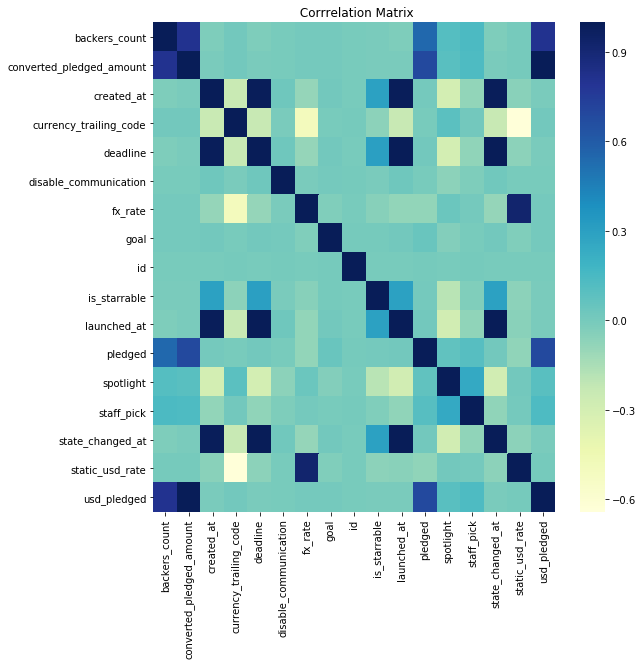

In [30]:
#画出相关矩阵热力图
fig, ax =plt.subplots(figsize =(9,9))
correlation_table = df.corr()
print(correlation_table)
sns.heatmap(correlation_table, ax =ax, cmap="YlGnBu")
ax.set_title(' Corrrelation Matrix')